PART ONE

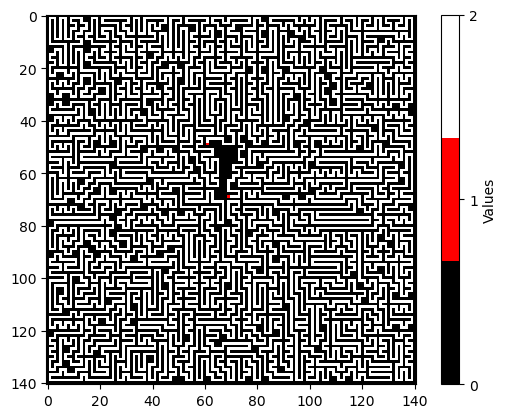

[['#' '#' '#' ... '#' '#' '#']
 ['#' 1360 1359 ... 8439 8438 '#']
 ['#' 1361 '#' ... '#' 8437 '#']
 ...
 ['#' 3705 '#' ... '#' 5993 '#']
 ['#' 3706 3707 ... 5991 5992 '#']
 ['#' '#' '#' ... '#' '#' '#']]
1524


In [24]:
import matplotlib.pyplot as plt
import numpy as np

def ImportToArray(filepath):
    with open(filepath,'r') as file:
        lines = [list(line.strip()) for line in file.readlines()]
    return np.array(lines, dtype=object)

def Score_At_Index(index, Grid, tolerance):
    count =0
    if not Grid[index[0], index[1]]=='#':
        return 0 

    List_of_sides = []
    if isinstance(Grid [index[0]-1, index[1]], int):
        List_of_sides.append(Grid[index[0]-1, index[1]])
    if isinstance(Grid [index[0]+1, index[1]], int):
        List_of_sides.append(Grid[index[0]+1, index[1]])
    if isinstance(Grid [index[0], index[1]-1], int):
        List_of_sides.append(Grid[index[0], index[1]-1])
    if isinstance(Grid [index[0], index[1]+1], int):
        List_of_sides.append(Grid[index[0], index[1]+1])    

    List_of_sides2 = List_of_sides.copy()

    for item in List_of_sides:
        for item2 in List_of_sides2:
            if item>item2+2+tolerance-1:
                #print(item-item+2)
                count +=1

    #print(index, List_of_sides, count)

    return count

def PlotGrid(Grid):
    Grid = Grid.copy()
    Start = np.argwhere(Grid=='S')
    End = np.argwhere(Grid=='E')
    InPath = np.argwhere(Grid =='@')
    Walls = np.argwhere(Grid=='#')
    Corridors = np.argwhere(Grid == '.')

    for item in Walls:
        Grid[item[0], item[1]] = 0  # Assign 0 for bytes
    for item in Start:
        Grid[item[0], item[1]] = 1  # Assign 1 for places
    for item in End:
        Grid[item[0], item[1]] = 1  # Assign 1 for places
    for item in Corridors:
        Grid[item[0], item[1]] = 2  # Assign 2 for places
    for item in InPath:
        Grid[item[0], item[1]] = 1  # Assign 1 for places

    Grid = Grid.astype(int)
    cmap = plt.cm.colors.ListedColormap(['black', 'red', 'white'])
    plt.imshow(Grid, cmap=cmap, origin='upper', interpolation='none')
    plt.grid(False)  # Disable grid lines
    plt.colorbar(ticks=[0, 1, 2], label='Values')
    plt.show()

Scenario = 'Input'
tolerance = 100 # at least this size difference 1 or 100

Grid = ImportToArray('Day20'+Scenario+'.txt')
PlotGrid(Grid)
step = 0 
index = np.argwhere(Grid=='S')[0]
while Grid[index[0], index[1]] in ('.','S', 'E'):
    Grid[index[0], index[1]] = step
    step = step+1
    if Grid[index[0]-1, index[1]] in ('.', 'E'):
        index[0] = index[0]-1
    elif Grid[index[0]+1, index[1]] in ('.', 'E'):
        index[0] = index[0]+1
    elif Grid[index[0], index[1]-1] in ('.', 'E'):
        index[1] = index[1]-1
    elif Grid[index[0], index[1]+1] in ('.', 'E'):
        index[1] = index[1]+1

print(Grid)
#PlotGrid(Grid)

total_count = 0 
for row in range(1, Grid.shape[0]-1):
    for col in range(1,Grid.shape[1]-1):
        total_count += Score_At_Index([row, col], Grid, tolerance)

print(total_count) #TestAnsIs44 


PART TWO

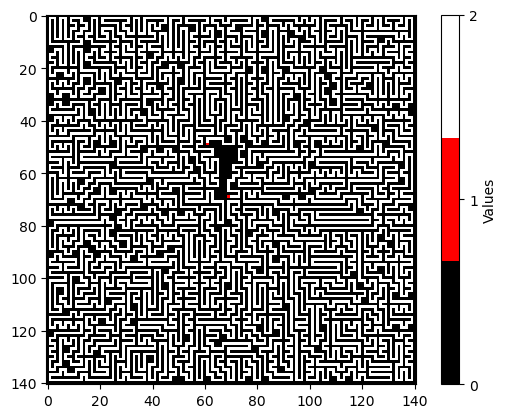

[['#' '#' '#' ... '#' '#' '#']
 ['#' 1360 1359 ... 8439 8438 '#']
 ['#' 1361 '#' ... '#' 8437 '#']
 ...
 ['#' 3705 '#' ... '#' 5993 '#']
 ['#' 3706 3707 ... 5991 5992 '#']
 ['#' '#' '#' ... '#' '#' '#']]
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import copy

def ImportToArray(filepath):
    with open(filepath,'r') as file:
        lines = [list(line.strip()) for line in file.readlines()]
    return np.array(lines, dtype=object)

def PlotGrid(Grid):
    Grid = Grid.copy()
    Start = np.argwhere(Grid=='S')
    End = np.argwhere(Grid=='E')
    InPath = np.argwhere(Grid =='@')
    Walls = np.argwhere(Grid=='#')
    Corridors = np.argwhere(Grid == '.')

    for item in Walls:
        Grid[item[0], item[1]] = 0  # Assign 0 for bytes
    for item in Start:
        Grid[item[0], item[1]] = 1  # Assign 1 for places
    for item in End:
        Grid[item[0], item[1]] = 1  # Assign 1 for places
    for item in Corridors:
        Grid[item[0], item[1]] = 2  # Assign 2 for places
    for item in InPath:
        Grid[item[0], item[1]] = 1  # Assign 1 for places

    Grid = Grid.astype(int)
    cmap = plt.cm.colors.ListedColormap(['black', 'red', 'white'])
    plt.imshow(Grid, cmap=cmap, origin='upper', interpolation='none')
    plt.grid(False)  # Disable grid lines
    plt.colorbar(ticks=[0, 1, 2], label='Values')
    plt.show()

def FillGridWithNumbers(Grid):
    step = 0 
    index = np.argwhere(Grid=='S')[0]
    while Grid[index[0], index[1]] in ('.','S', 'E'):
        Grid[index[0], index[1]] = step
        step = step+1
        if Grid[index[0]-1, index[1]] in ('.', 'E'):
            index[0] = index[0]-1
        elif Grid[index[0]+1, index[1]] in ('.', 'E'):
            index[0] = index[0]+1
        elif Grid[index[0], index[1]-1] in ('.', 'E'):
            index[1] = index[1]-1
        elif Grid[index[0], index[1]+1] in ('.', 'E'):
            index[1] = index[1]+1
    return Grid

DictSets ={}

def Set_That_Can_Be_Reached_In_X_Seconds (index, Seconds): # only going through '#' values, but reaching a '.' with a number
    
    if ((index[0], index[1]), Seconds) in DictSets:
        return DictSets[((index[0], index[1]), Seconds)]
    
    print('Open', index, Seconds)
    global Grid
    full_set = set()
    Movements = [[1,0], [-1,0], [0,1], [0,-1]]
    rows, cols = Grid.shape

    for mvmnt in Movements:
        dx, dy = mvmnt

        if not(index[0]+dx in range(0, rows) and index[1] +dy in range(0, cols)):
            continue

        if Grid[index[0]+dx,index[1]+dy] == '#':
            if Seconds > 1:
                new_set = Set_That_Can_Be_Reached_In_X_Seconds ([index[0]+dx,index[1]+dy], Seconds-1)
                full_set.update(new_set)
        else:
            full_set.add(Grid[index[0]+dx,index[1]+dy])
    print('Close', index, Seconds, full_set)

    DictSets[((index[0], index[1]), Seconds)] = full_set

    return full_set            

def CombineDicts(current_dict, new_dict, Seconds):
    #print(current_dict)
    #print(new_dict)
    new_dict = new_dict.copy()
    for new_key, new_value in new_dict.items():
        new_dict[new_key] = new_value + 1

    for current_key, current_value in current_dict.items():
        for new_key, new_value in new_dict.items():
            if current_key == new_key:
                if current_value>new_value:
                    current_dict[current_key] = new_value
                    if new_value >Seconds:
                        print('There is an issue here!')
                else:
                    new_dict[new_key] = current_value
                    if current_value >Seconds:
                        print('There is an issue here!')
    
    combined_dict = current_dict | new_dict

    #print('Combo',combined_dict)

    return combined_dict


DictOfDicts = {}
def Dict_That_Can_Be_Reached_In_X_Seconds (index, Seconds): # only going through '#' values, but reaching a '.' with a number
    #print('Open', index, Seconds)

    full_dict={}
    if ((index[0], index[1]), Seconds) in DictOfDicts:
        full_dict = DictOfDicts[((index[0], index[1]), Seconds)]
        #print('Close Quick', index, Seconds, full_dict)
        return full_dict

    global Grid
    global MaxSteps

    
    Movements = [[1,0], [-1,0], [0,1], [0,-1]]
    rows, cols = Grid.shape

    for mvmnt in Movements:
        dx, dy = mvmnt

        if not(index[0]+dx in range(0, rows) and index[1] +dy in range(0, cols)):
            continue

        if Seconds >1:
            new_dict = Dict_That_Can_Be_Reached_In_X_Seconds ([index[0]+dx,index[1]+dy], Seconds-1)
            full_dict = CombineDicts (full_dict, new_dict, Seconds)

        if not(Grid[index[0]+dx,index[1]+dy] == '#'):
            full_dict[Grid[index[0]+dx,index[1]+dy]] = 1


    if not(Grid[index[0],index[1]] == '#'):
        full_dict[Grid[index[0],index[1]]] = 0

    #print('Close', index, Seconds, full_dict)
    DictOfDicts[((index[0], index[1]), Seconds)] = full_dict.copy() #deep copy should work
    #print('Update',((index[0], index[1]), Seconds),'with', full_dict)
    #print('Equals',DictOfDicts)

    return full_dict     

Dict_Summary_Of_Saved_Time ={}
def Routes_That_Save_X_Seconds(starting_value, Dict_Of_Options, tolerance):
    count = 0
    for key, value in Dict_Of_Options.items():
        if key - value - starting_value >= tolerance:
            #print('Start at', starting_value, 'End At', key, 'Taking Time:', value, 'Saving:', key - value - starting_value)
            count +=1
            if key - value - starting_value in Dict_Summary_Of_Saved_Time:
                Dict_Summary_Of_Saved_Time[key - value - starting_value] = Dict_Summary_Of_Saved_Time[key - value - starting_value] +1
            else:
                Dict_Summary_Of_Saved_Time[key - value - starting_value] =1

    return count

Scenario = 'Input'
tolerance = 100 # at least this size difference 
MaxSteps = 20

Grid = ImportToArray('Day20'+Scenario+'.txt')
PlotGrid(Grid)

allspaces = np.argwhere(Grid=='.')
StartingSpace = np.argwhere(Grid =='S')
allspaces = np.vstack((allspaces, StartingSpace))

#allspaces=[[11,5],[13,5],[12,5]]
#allspaces=[[3,1],[2,1]]

Grid = FillGridWithNumbers(Grid)
print(Grid)


final_count =0
tempcount =0
for index in allspaces:
    TestDict = Dict_That_Can_Be_Reached_In_X_Seconds(index, MaxSteps)
    #print(Grid[index[0],index[1]])
    #DictOfDicts ={} # It doesn't work If I get rid of this!!
    #print(DictOfDicts)
    tempcount +=1
    if tempcount%10 ==0:
        print(tempcount)
    final_count += Routes_That_Save_X_Seconds (Grid[index[0],index[1]], TestDict, tolerance)


print(final_count)
print(dict(sorted(Dict_Summary_Of_Saved_Time.items())))
#print(DictOfDicts)
